## Prep the data

In [17]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import utils
%matplotlib inline

In [2]:
df = pd.read_csv('shot_logs.csv')

In [3]:
# Choose the features
features = [
    "SHOT_NUMBER",
    "PERIOD",
#     "GAME_CLOCK",
    "SHOT_CLOCK",
    "DRIBBLES",
    "TOUCH_TIME",
    "SHOT_DIST",
    "PTS_TYPE",
    "CLOSE_DEF_DIST",
#     "FGM",  # cant have this because it is knowledge from after the shot (indicates result)
]

non_scaled_features = [
#     "PTS_TYPE"
]

advanced_features = [
    "LOCATION",
    "GAME_ID",
    "MATCHUP",
    "player_id",
    "CLOSEST_DEFENDER_PLAYER_ID",
]
target = ['PTS']

In [4]:
# Run normalization functions
df['SHOT_CLOCK'] = utils.normalize_shotclock(df['SHOT_CLOCK'])
df['LOCATION'] = utils.normalize_location(df['LOCATION'])
df['PTS'] = np.float64(df['PTS'])
features.remove("PTS_TYPE")
df = utils.rescale_features(features, df, non_scaled_features)
features.append("PTS_TYPE")

In [5]:
df[features]

,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,PTS_TYPE
0,0.000000,0.000000,0.450000,0.06250,0.877984,0.163136,0.024436,2
1,0.027027,0.000000,0.141667,0.00000,0.872149,0.597458,0.114662,3
2,0.054054,0.000000,0.000000,0.09375,0.882228,0.213983,0.016917,2
3,0.081081,0.166667,0.429167,0.06250,0.877984,0.364407,0.063910,2
4,0.108108,0.166667,0.454167,0.06250,0.882228,0.078390,0.020677,2
5,0.135135,0.166667,0.379167,0.06250,0.891247,0.389831,0.048872,2
6,0.162162,0.500000,0.604167,0.34375,0.915650,0.438559,0.114662,2
7,0.189189,0.500000,0.141667,0.09375,0.881167,0.074153,0.039474,2
8,0.216216,0.500000,0.516667,0.00000,0.872149,0.521186,0.137218,3
9,0.000000,0.166667,0.725000,0.00000,0.873740,0.474576,0.372180,3


In [6]:
# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.20, random_state=42)

## Play with models

In [7]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import cross_val_score

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(100), activation='logistic')
print "Score %.4f (+/- %.4f)" % utils.get_cross_validated_score(df[features], df[target], clf)

Score 0.6097 (+/- 0.0014)


In [9]:
clf = MLPClassifier(hidden_layer_sizes=(len(features)), activation='logistic')
print "Score %.4f (+/- %.4f)" % utils.get_cross_validated_score(df[features], df[target], clf)

Score 0.6106 (+/- 0.0061)


In [10]:
clf = MLPClassifier(hidden_layer_sizes=(1000), activation='logistic')
print "Score %.4f (+/- %.4f)" % utils.get_cross_validated_score(df[features], df[target], clf)

Score 0.6029 (+/- 0.0208)


In [11]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='logistic')
print "Score %.4f (+/- %.4f)" % utils.get_cross_validated_score(df[features], df[target], clf)

Score 0.6141 (+/- 0.0061)


In [12]:
clf = MLPClassifier(hidden_layer_sizes=(100, 10, 3), activation='logistic')
print "Score %.4f (+/- %.4f)" % utils.get_cross_validated_score(df[features], df[target], clf)

Score 0.6043 (+/- 0.0285)


<Container object of 3 artists>

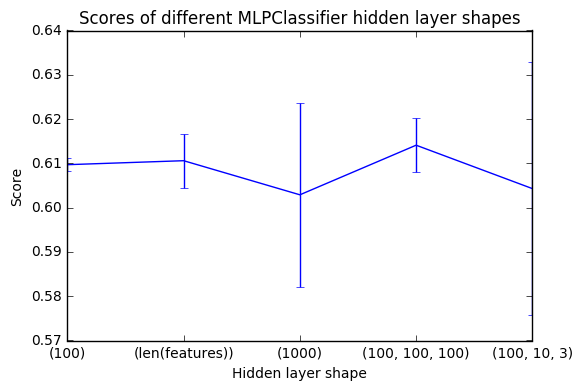

In [39]:
results = np.array([0.6097, 0.6106, 0.6029, 0.6141, 0.6043])
error = np.array([0.0014, .0061, .0208, .0061, 0.0285])
lower = results - error
upper = results + error
x = range(len(results))

labels = ["(100)", "(len(features))", "(1000)", "(100, 100, 100)", "(100, 10, 3)"]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xticks(x, labels)
ax.set_title("Scores of different MLPClassifier hidden layer shapes")
ax.set_xlabel("Hidden layer shape")
ax.set_ylabel("Score")
plt.errorbar(x, results, yerr=error)

# print upper, lower

In [13]:
df_3pts = df[df['PTS_TYPE'] == 3.0]
df_2pts = df[df['PTS_TYPE'] == 2.0]
df_1pts = df[df['PTS_TYPE'] == 1.0]
print len(df_3pts) / float(len(df)), len(df_2pts) / float(len(df))

threepm = df_3pts[df_3pts['FGM'] == 1]
twopm = df_2pts[df_2pts['FGM'] == 1]

print len(threepm)/float(len(df_3pts)), len(twopm)/float(len(df_2pts))

0.264669826422 0.735330173578
0.351516403115 0.488356535313


In [14]:
X3_train, X3_test, y3_train, y3_test = train_test_split(df_3pts[features], df_3pts[target], test_size=0.20, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(df_2pts[features], df_2pts[target], test_size=0.20, random_state=42)

In [15]:
clf = MLPClassifier(hidden_layer_sizes=(100), activation='logistic')
clf.fit(X2_train, y2_train)
print clf.score(X2_test, y2_test)

/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.607698433767
